In [1]:
from keras.layers import Conv2D, UpSampling2D, InputLayer, Conv2DTranspose
from keras.layers import Activation, Dense, Dropout, Flatten
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb, rgb2gray, xyz2lab
from skimage.io import imsave
import numpy as np
import os
import random
import tensorflow as tf

Using TensorFlow backend.


In [2]:
import cv2

from scipy.misc import imresize
from skimage.transform import resize

import glob

import matplotlib.pyplot as plt
%matplotlib inline

from keras.callbacks import EarlyStopping

In [3]:
def Q64(a,b):
    h,w = a.shape
    y = np.zeros((h,w))
    for i in range(h):
        for j in range(w):
            y[i,j] = 8*np.floor(a[i,j]/32)+np.floor(b[i,j]/32)
    return y

In [4]:
def deQ64(x,y):
    h,w = y.shape
    a = np.zeros((h,w))
    b = np.zeros((h,w))
    for i in range(h):
        for j in range(w):
            yi = y[i,j]
            a[i,j] = np.floor(yi/8)*32+16
            b[i,j] = (yi-8*np.floor(yi/8))*32+16
    img_lab = np.zeros((h,w,3))
    img_lab[:,:,0] = x
    img_lab[:,:,1] = a
    img_lab[:,:,2] = b
    img = cv2.cvtColor(img_lab.astype(np.uint8), cv2.COLOR_LAB2RGB)
    return img

In [ ]:
# read images and split a b
img_all = []
X = []
Y = []
for img in glob.glob(r"../../images/*.jpg"):
    n= cv2.imread(img)#BGR
    if not n is None and np.mean(n)<250 and np.mean(np.std(n,axis=2))>2:
    # drop None pic, almost white pic, almost gray scale pic
        m = imresize(n,(400,400,3))
        img_lab = cv2.cvtColor(m.astype(np.uint8), cv2.COLOR_BGR2LAB)
        L = img_lab[:,:,0]
        a = img_lab[:,:,1]
        b = img_lab[:,:,2]
        img_all.append(m)
        y = Q64(a,b)
        L = L.reshape(1, 400, 400, 1)
        y = y.reshape(1, 400, 400, 1) 
        Y.append(y)
        X.append(L)

In [5]:
X=np.array(X)
Y=np.array(Y)

num = 20
X=np.reshape(X, (num, 400, 400, 1))
Y=np.reshape(Y, (num, 400, 400, 1))

NameError: name 'X' is not defined

In [9]:
# Building the neural network 九层神经网络 跑一次就行了
model = Sequential()
model.add(InputLayer(input_shape=(None, None, 1)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', strides=2))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))#deconv
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(1, (3, 3), activation='relu', padding='same'))# best sigmoid then *64
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 1)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, None, None, 8)     80        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, None, None, 8)     584       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, None, None, 16)    1168      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, None, None, 16)    2320      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, None, None, 32)    4640      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, None, None, 32)    9248      
__________

In [10]:
# Finish model
model.compile(optimizer='adam',loss='mse')#class loss

In [11]:
# 5 mins 823pm-31; 209-
hist = model.fit(x=X, 
    y=Y,
    batch_size=4,
    epochs=1000, callbacks=[EarlyStopping(patience=5)])

Epoch 1/1000
20/20 [==============================] - 34s 2s/step - loss: 400.9816
Epoch 2/1000


C:\ProgramData\Anaconda3\lib\site-packages\keras\callbacks.py:526: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


20/20 [==============================] - 25s 1s/step - loss: 202.1256
Epoch 3/1000
20/20 [==============================] - 27s 1s/step - loss: 151.5880
Epoch 4/1000
20/20 [==============================] - 28s 1s/step - loss: 132.0972
Epoch 5/1000
20/20 [==============================] - 32s 2s/step - loss: 114.7626
Epoch 6/1000
20/20 [==============================] - 28s 1s/step - loss: 114.3649
Epoch 7/1000
20/20 [==============================] - 24s 1s/step - loss: 108.2532
Epoch 8/1000
20/20 [==============================] - 27s 1s/step - loss: 114.1328
Epoch 9/1000
20/20 [==============================] - 27s 1s/step - loss: 105.1786
Epoch 10/1000
20/20 [==============================] - 26s 1s/step - loss: 100.9122
Epoch 11/1000
20/20 [==============================] - 25s 1s/step - loss: 98.9536
Epoch 12/1000
20/20 [==============================] - 24s 1s/step - loss: 96.3517
Epoch 13/1000
20/20 [==============================] - 26s 1s/step - loss: 91.4347
Epoch 14/1000
20

20/20 [==============================] - 10s 500ms/step - loss: 20.1489
Epoch 100/1000
20/20 [==============================] - 10s 488ms/step - loss: 20.1769
Epoch 101/1000
20/20 [==============================] - 10s 494ms/step - loss: 21.2326
Epoch 102/1000
20/20 [==============================] - 10s 499ms/step - loss: 20.4007
Epoch 103/1000
20/20 [==============================] - 10s 487ms/step - loss: 22.1100
Epoch 104/1000
20/20 [==============================] - 10s 487ms/step - loss: 25.7828
Epoch 105/1000
20/20 [==============================] - 10s 488ms/step - loss: 22.7120
Epoch 106/1000
20/20 [==============================] - 10s 485ms/step - loss: 19.2876
Epoch 107/1000
20/20 [==============================] - 10s 491ms/step - loss: 20.5705
Epoch 108/1000
20/20 [==============================] - 10s 489ms/step - loss: 22.2304
Epoch 109/1000
20/20 [==============================] - 10s 491ms/step - loss: 20.8085
Epoch 110/1000
20/20 [==============================] - 10

20/20 [==============================] - 10s 490ms/step - loss: 15.9818
Epoch 288/1000
20/20 [==============================] - 10s 487ms/step - loss: 15.5656
Epoch 289/1000
20/20 [==============================] - 10s 486ms/step - loss: 15.5580
Epoch 290/1000
20/20 [==============================] - 10s 509ms/step - loss: 15.5107
Epoch 291/1000
20/20 [==============================] - 10s 488ms/step - loss: 15.2911
Epoch 292/1000
20/20 [==============================] - 10s 493ms/step - loss: 15.1626
Epoch 293/1000
20/20 [==============================] - 10s 504ms/step - loss: 16.5525
Epoch 294/1000
20/20 [==============================] - 10s 496ms/step - loss: 16.8726
Epoch 295/1000
20/20 [==============================] - 10s 492ms/step - loss: 16.5701
Epoch 296/1000
20/20 [==============================] - 10s 487ms/step - loss: 17.8212
Epoch 297/1000
20/20 [==============================] - 10s 487ms/step - loss: 17.9910
Epoch 298/1000
20/20 [==============================] - 10

20/20 [==============================] - 10s 491ms/step - loss: 13.6833
Epoch 476/1000
20/20 [==============================] - 10s 503ms/step - loss: 14.5006
Epoch 477/1000
20/20 [==============================] - 10s 486ms/step - loss: 13.8951
Epoch 478/1000
20/20 [==============================] - 10s 486ms/step - loss: 14.1975
Epoch 479/1000
20/20 [==============================] - 10s 488ms/step - loss: 13.3583
Epoch 480/1000
20/20 [==============================] - 10s 488ms/step - loss: 14.1293
Epoch 481/1000
20/20 [==============================] - 10s 486ms/step - loss: 13.9409
Epoch 482/1000
20/20 [==============================] - 10s 487ms/step - loss: 12.9521
Epoch 483/1000
20/20 [==============================] - 10s 488ms/step - loss: 12.9873
Epoch 484/1000
20/20 [==============================] - 10s 499ms/step - loss: 13.6761
Epoch 485/1000
20/20 [==============================] - 10s 487ms/step - loss: 14.5500
Epoch 486/1000
20/20 [==============================] - 10

20/20 [==============================] - 10s 488ms/step - loss: 12.4016
Epoch 664/1000
20/20 [==============================] - 10s 485ms/step - loss: 11.9473
Epoch 665/1000
20/20 [==============================] - 10s 486ms/step - loss: 11.4022
Epoch 666/1000
20/20 [==============================] - 10s 484ms/step - loss: 12.2114
Epoch 667/1000
20/20 [==============================] - 10s 500ms/step - loss: 12.2987
Epoch 668/1000
20/20 [==============================] - 10s 490ms/step - loss: 11.7824
Epoch 669/1000
20/20 [==============================] - 10s 488ms/step - loss: 11.3256
Epoch 670/1000
20/20 [==============================] - 10s 488ms/step - loss: 11.6659
Epoch 671/1000
20/20 [==============================] - 10s 488ms/step - loss: 11.4279
Epoch 672/1000
20/20 [==============================] - 10s 505ms/step - loss: 11.5529
Epoch 673/1000
20/20 [==============================] - 10s 488ms/step - loss: 11.2747
Epoch 674/1000
20/20 [==============================] - 10

20/20 [==============================] - 10s 505ms/step - loss: 10.3965
Epoch 852/1000
20/20 [==============================] - 10s 487ms/step - loss: 10.5234
Epoch 853/1000
20/20 [==============================] - 10s 486ms/step - loss: 10.1709
Epoch 854/1000
20/20 [==============================] - 10s 487ms/step - loss: 10.0264
Epoch 855/1000
20/20 [==============================] - 10s 504ms/step - loss: 10.0222
Epoch 856/1000
20/20 [==============================] - 10s 489ms/step - loss: 10.2236
Epoch 857/1000
20/20 [==============================] - 10s 486ms/step - loss: 10.4102
Epoch 858/1000
20/20 [==============================] - 10s 487ms/step - loss: 10.1370
Epoch 859/1000
20/20 [==============================] - 10s 487ms/step - loss: 9.8849
Epoch 860/1000
20/20 [==============================] - 10s 488ms/step - loss: 10.5174
Epoch 861/1000
20/20 [==============================] - 10s 486ms/step - loss: 10.5112
Epoch 862/1000
20/20 [==============================] - 10s

In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")

In [ ]:
from keras.models import model_from_json

In [ ]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")

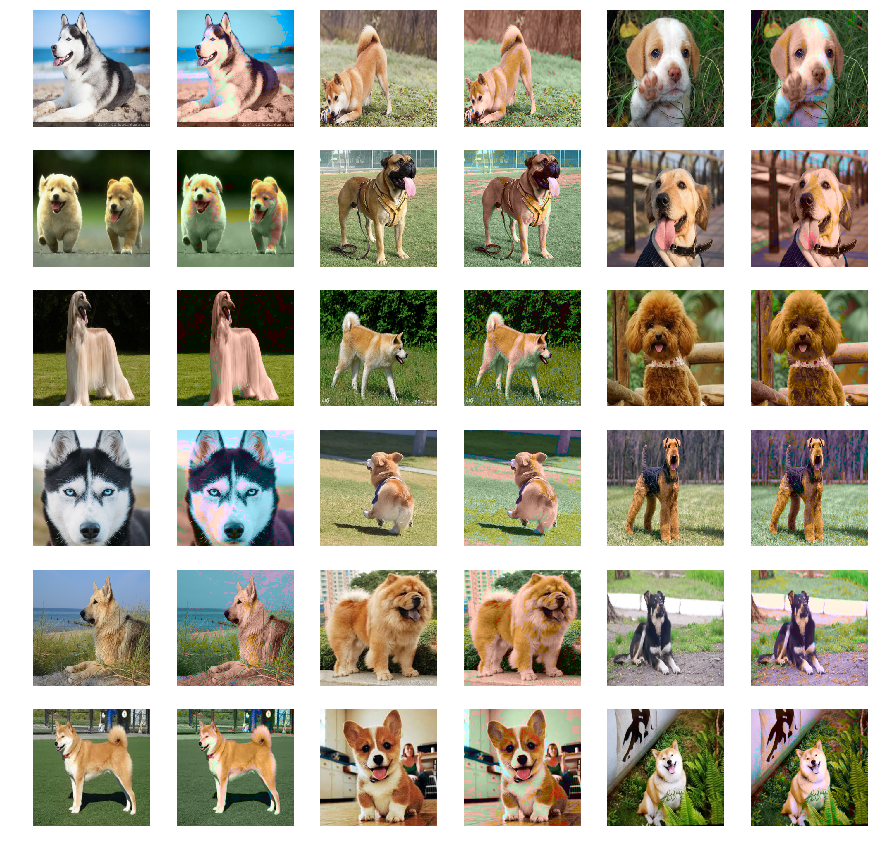

In [15]:
# reconstuction
j =1
plt.figure(figsize=(15,15))
for i in range(18):
    plt.subplot(6,6,j)
    j += 1
    plt.imshow(cv2.cvtColor(img_all[i],cv2.COLOR_BGR2RGB))
    plt.axis('OFF')
    plt.subplot(6,6,j)
    j += 1
    img_re = deQ64(X[i,:,:,0],Y[i,:,:,0])
    plt.imshow(img_re)
    plt.axis('OFF')

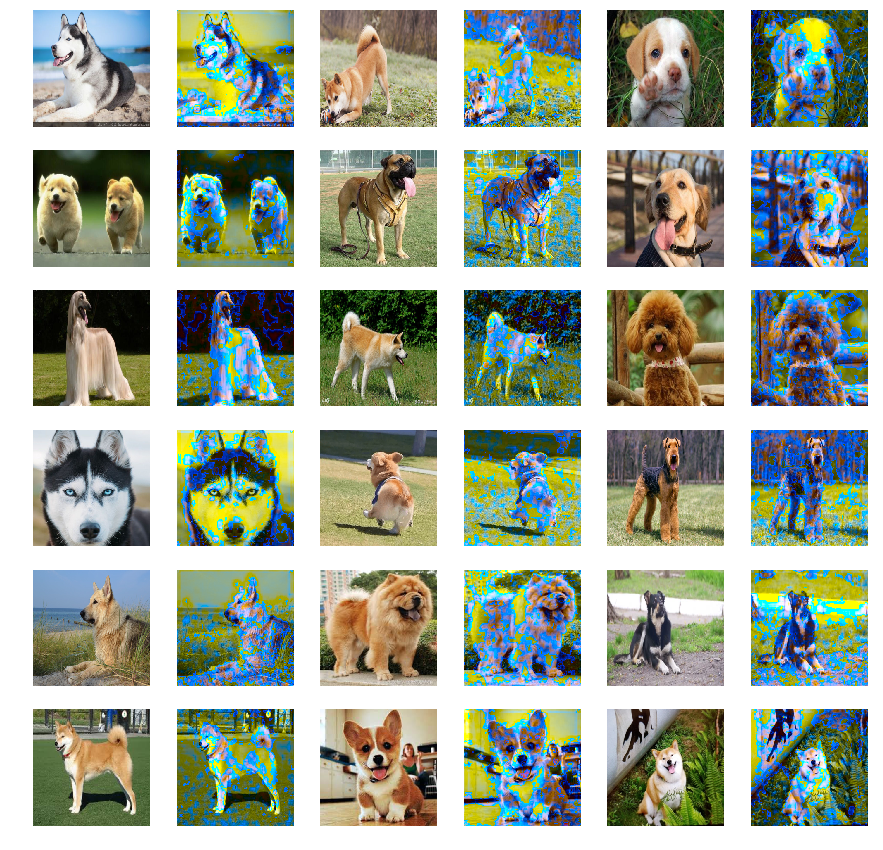

In [32]:
# predict train image
j =1
plt.figure(figsize=(15,15))
Yhat = model.predict(X)
for i in range(18):
    plt.subplot(6,6,j)
    j += 1
    plt.imshow(cv2.cvtColor(img_all[i],cv2.COLOR_BGR2RGB))
    plt.axis('OFF')
    plt.subplot(6,6,j)
    j += 1
    Yhat = model.predict(X[i:i+1])
    imgtr_re = deQ64(X[i,:,:,0],Yhat[0,:,:,0])
    plt.imshow(imgtr_re)
    plt.axis('OFF')

In [37]:
# read test image
imgts_all = []
Xts = []
Yts = []
for img in glob.glob(r"../../images/test/*.jpg"):
    n= cv2.imread(img)#BGR
    if not n is None and np.mean(n)<250 and np.mean(np.std(n,axis=2))>2:
    # drop None pic, almost white pic, almost gray scale pic
        m = imresize(n,(400,400,3))
        img_lab = cv2.cvtColor(m.astype(np.uint8), cv2.COLOR_BGR2LAB)
        L = img_lab[:,:,0]
        a = img_lab[:,:,1]
        b = img_lab[:,:,2]
        imgts_all.append(m)
        y = Q64(a,b)
        L = L.reshape(1, 400, 400, 1)
        y = y.reshape(1, 400, 400, 1) 
        Yts.append(y)
        Xts.append(L)
Xts=np.array(Xts)
Yts=np.array(Yts)

num = 3
Xts=np.reshape(Xts, (num, 400, 400, 1))
Yts=np.reshape(Yts, (num, 400, 400, 1))

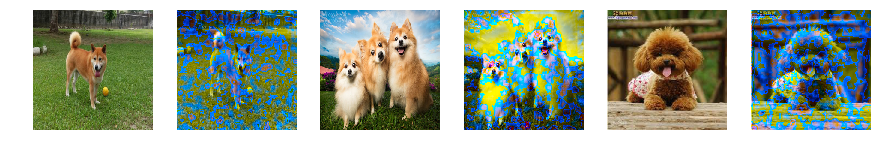

In [38]:
# predict new image
j =1
plt.figure(figsize=(15,5))

for i in range(3):
    plt.subplot(1,6,j)
    j += 1
    plt.imshow(cv2.cvtColor(imgts_all[i],cv2.COLOR_BGR2RGB))
    plt.axis('OFF')
    plt.subplot(1,6,j)
    j += 1
    Ytshat = model.predict(Xts[i:i+1])
    imgts_re = deQ64(Xts[i,:,:,0],Ytshat[0,:,:,0])
    plt.imshow(imgts_re)
    plt.axis('OFF')

Q64缺少a=127，b=127的中间值，被分配到周边红黄蓝色，另外形成的Y有block。